In [1]:
import numpy as np
from scipy import stats, signal
import matplotlib.pyplot as plt
%matplotlib inline

 - https://docs.scipy.org/doc/scipy/reference/signal.html
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
 - https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter
 - https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.signal.savgol_filter.html

In [2]:
N = 10000
t = np.linspace(0, 100, N)

In [3]:
baseline = 8e-4*t + 0.71 + np.random.randn(N)*5e-3

In [4]:
p1 = stats.norm(scale=0.1, loc=20).pdf(t)
p2 = stats.norm(scale=0.2, loc=40).pdf(t)
p3 = stats.norm(scale=0.15, loc=60).pdf(t)
p4 = stats.norm(scale=0.25, loc=61).pdf(t)
p5 = stats.lognorm(0.3, loc=75).pdf(t)
p6 = stats.lognorm(0.4, loc=80, scale=0.5).pdf(t)

In [5]:
gt = baseline+p1+p2+p3+p4+p5+p6
gtf = signal.savgol_filter(tuple(gt), polyorder=3, window_length=25)

In [6]:
peak = signal.find_peaks(gtf, height=1.0, threshold=1e-4, width=0.5, prominence=1)
#peak = signal.find_peaks(gt, height=1.0, threshold=2e-3, width=0.1, prominence=1, distance=100)
peak

(array([2000, 4000, 5999, 6099, 7591, 8042]),
 {'peak_heights': array([4.63720462, 2.73395587, 3.40716247, 2.35100555, 2.16106515,
         2.93124852]),
  'left_thresholds': array([0.01069599, 0.00064302, 0.00932201, 0.00171053, 0.0007622 ,
         0.00286836]),
  'right_thresholds': array([0.02567224, 0.00414297, 0.00182201, 0.00027495, 0.00114278,
         0.00430917]),
  'prominences': array([3.91471758, 1.99291032, 2.65099799, 1.4318283 , 1.40030908,
         2.15779021]),
  'left_bases': array([   4, 2044, 2044, 6042, 6527, 6527]),
  'right_bases': array([2044, 4099, 6527, 6527, 8007, 8207]),
  'widths': array([24.25528966, 47.20744263, 35.63029311, 54.77994539, 66.319056  ,
         41.63829988]),
  'width_heights': array([2.67984583, 1.73750071, 2.08166347, 1.6350914 , 1.46091061,
         1.85235341]),
  'left_ips': array([1987.66779018, 3976.01551013, 5981.6462014 , 6072.03322687,
         7563.37112682, 8025.83208937]),
  'right_ips': array([2011.92307984, 4023.22295276, 60

Text(0, 0.5, 'Signal, $g(t)$')

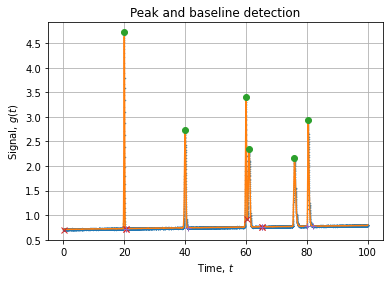

In [8]:
fig, axe = plt.subplots()
axe.plot(t, gt, '.', markersize=1)
axe.plot(t, gtf)
axe.plot(t[peak[0]], gt[peak[0]], 'o')
axe.plot(t[peak[1]['left_bases']], gt[peak[1]['left_bases']], 'x')
axe.plot(t[peak[1]['right_bases']], gt[peak[1]['right_bases']], '+')
#axe.set_xlim([55,65])
#axe.set_ylim([0.5, 1.0])
axe.grid()
axe.set_title("Peak and baseline detection")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Signal, $g(t)$")
#fig.savefig("chromato.svg")